# CSE 30 Week 4 Discussion Section

Section 1 Date: 04/24/2023 (in-person)

Section 2 Date: 04/25/2023 (remote)

Topic(s): Classes

In [1]:
class Polynomial:
    """
    A class representing a polynomial with real coefficients.
    """

    def __init__(self, coefficients):
        """
        Initializes a polynomial with the given coefficients.

        Args:
            coefficients (List[float]): A list of coefficients starting from the coefficient of the highest degree term.
        """
        self.coefficients = coefficients

    def coefficients_to_int(coefficients):
        """
        Converts the coefficients to integers if possible.

        Args:
            coefficients (list): The coefficients to convert.

        Returns:
            list: The coefficients as integers if possible.
        """
        coefficients_ = coefficients.copy()
        for i in range(len(coefficients)):
            if coefficients_[i] == int(coefficients_[i]):
                coefficients_[i] = int(coefficients_[i])
        return coefficients_

## Problem 1

Implement the `__str__` function in the `Polynomial` class which, given a polynomial with real coefficients, returns a string representation of the polynomial in the standard form, with terms ordered from highest to lowest degree, and with each term separated by a plus sign, including the sign of the coefficient of each term. The exponent of x should be properly displayed for each term, with the exponent of 1 suppressed, and the exponent of 0 displayed as a constant term. If the polynomial is the zero polynomial, the function should return the string '0'.

Also implement the `__repr__` function, which should simply print the definition of the instance.

In [2]:
def __str__(self):
    """
    Returns a string representation of the polynomial.

    Examples:
        >>> print(Polynomial([1, 2, 3]))
        x^2 + 2x + 3

    Returns:
        str: The string representation of the polynomial.
    """
    terms = []
    coefficients = Polynomial.coefficients_to_int(self.coefficients)
    for power, coeff in enumerate(reversed(coefficients)):  # coefficients[::-1]
        if coeff == 0:
            continue
        if power == 0:
            term = str(coeff)
        elif power == 1:
            term = f"{'' if coeff == 1 else '-' if coeff == -1 else coeff}x"
        else:
            term = f"{'' if coeff == 1 else '-' if coeff == -1 else coeff}x^{power}"
        terms.append(term)
    return " + ".join(reversed(terms)) if terms else "0"


def __repr__(self):
    """
    Returns a string representation of the polynomial that can be used to recreate the polynomial.

    Examples:
        >>> Polynomial([1, 2, 3])
        Polynomial([1, 2, 3])

    Returns:
        str: The string representation of the polynomial.
    """
    coefficients = Polynomial.coefficients_to_int(self.coefficients)
    return f"Polynomial({coefficients})"


Polynomial.__str__ = __str__
Polynomial.__repr__ = __repr__

In [3]:
def test_str():
    p1 = Polynomial([1, 2, 3])
    assert str(p1) == "x^2 + 2x + 3", f"Expected: x^2 + 2x + 3, but got: {str(p1)}"

    p2 = Polynomial([-1, 0, 1, 0, 0, 2])
    assert str(p2) == "-x^5 + x^3 + 2", f"Expected: -x^5 + x^3 + 2, but got: {str(p2)}"

    p3 = Polynomial([0, 0, 0, 0])
    assert str(p3) == "0", f"Expected: 0, but got: {str(p3)}"

    p4 = Polynomial([-1, 1])
    assert str(p4) == "-x + 1", f"Expected: -x + 1, but got: {str(p4)}"

    p5 = Polynomial([0])
    assert str(p5) == "0", f"Expected: 0, but got: {str(p5)}"

    print("test_str passed")


test_str()

test_str passed


## Problem 2

Problem 2: Implement the `__add__` function in the `Polynomial` class which, given two polynomials with real coefficients, returns a new polynomial that represents the sum of the two polynomials. If one of the polynomials is the zero polynomial, the function should return the other polynomial. The resulting polynomial should be ordered from highest to lowest degree, and any terms with coefficients equal to zero should be excluded from the polynomial.

In [ ]:
1 + 1

In [4]:
def __add__(self, other):
    """
    Adds two polynomials.

    Examples:
        >>> Polynomial([1, 2, 3]) + Polynomial([4, 5])
        Polynomial([1, 6, 8])

    Args:
        other (Polynomial): The polynomial to add to this polynomial.

    Returns:
        Polynomial: The sum of the two polynomials.
    """
    len1 = len(self.coefficients)
    len2 = len(other.coefficients)
    if len1 >= len2:
        coefficients = self.coefficients.copy()
        for i in range(len2):
            coefficients[len1 - len2 + i] += other.coefficients[i]
    else:
        coefficients = other.coefficients.copy()
        for i in range(len1):
            coefficients[len2 - len1 + i] += self.coefficients[i]
    return Polynomial(coefficients)


Polynomial.__add__ = __add__

In [5]:
3 + Polynomial([1, 2, 3])

TypeError: unsupported operand type(s) for +: 'int' and 'Polynomial'

In [6]:
def test_add():
    p1 = Polynomial([1, 2, 3])
    p2 = Polynomial([4, 5])
    p3 = p1 + p2
    assert p3.coefficients == [
        1,
        6,
        8,
    ], f"Expected: [1, 6, 8], but got: {p3.coefficients}"

    p4 = Polynomial([1, 2, 3])
    p5 = Polynomial([4, 5, 6])
    p6 = p4 + p5
    assert p6.coefficients == [
        5,
        7,
        9,
    ], f"Expected: [5, 7, 9], but got: {p6.coefficients}"

    p7 = Polynomial([1, 2, 3])
    p8 = Polynomial([4, 5, 6, 7])
    p9 = p7 + p8
    assert p9.coefficients == [
        4,
        6,
        8,
        10,
    ], f"Expected: [4, 6, 8, 10], but got: {p9.coefficients}"

    print("test_add passed")


test_add()

test_add passed


## Problem 3

Problem 3: Implement the `__sub__` function in the Polynomial class which, given two polynomials with real coefficients, returns a new polynomial that represents the difference between the two polynomials, which is defined as the first polynomial minus the second polynomial. The resulting polynomial should be ordered from highest to lowest degree, and any terms with coefficients equal to zero should be excluded from the polynomial.

In [7]:
def __sub__(self, other):
    """
    Subtracts a polynomial from this polynomial.

    Examples:
        >>> Polynomial([1, 2, 3]) - Polynomial([4, 5])
        Polynomial([1, -2, -2])

    Args:
        other (Polynomial): The polynomial to subtract from this polynomial.

    Returns:
        Polynomial: The difference of the two polynomials.
    """
    negative_other = Polynomial([-c for c in other.coefficients])
    return self + negative_other


Polynomial.__sub__ = __sub__

In [8]:
def test_sub():
    p1 = Polynomial([1, 2, 3])
    p2 = Polynomial([4, 5])
    p3 = p1 - p2
    assert p3.coefficients == [
        1,
        -2,
        -2,
    ], f"Expected: [1, -2, -2], but got: {p3.coefficients}"

    p4 = Polynomial([1, 2, 3])
    p5 = Polynomial([4, 5, 6])
    p6 = p4 - p5
    assert p6.coefficients == [
        -3,
        -3,
        -3,
    ], f"Expected: [-3, -3, -3], but got: {p6.coefficients}"

    p7 = Polynomial([1, 2, 3])
    p8 = Polynomial([4, 5, 6, 7])
    p9 = p7 - p8
    assert p9.coefficients == [
        -4,
        -4,
        -4,
        -4,
    ], f"Expected: [-4, -4, -4, -4], but got: {p9.coefficients}"

    print("test_sub passed")


test_sub()

test_sub passed


## Problem 4

Implement the `__mul__` function in the `Polynomial` class which, given two polynomials with real coefficients, returns a new polynomial that represents the product of the two polynomials. The resulting polynomial should be ordered from highest to lowest degree, and any terms with coefficients equal to zero should be excluded from the polynomial. Note that the degree of the resulting polynomial should be the sum of the degrees of the input polynomials.

In [9]:
def __mul__(self, other):
    """
    Multiplies two polynomials.

    Examples:
        >>> Polynomial([1, 2, 3]) * Polynomial([4, 5])
        Polynomial([4, 13, 22, 15])

    Args:
        other (Polynomial): The polynomial to multiply with this polynomial.

    Returns:
        Polynomial: The product of the two polynomials.
    """
    len1 = len(self.coefficients)
    len2 = len(other.coefficients)
    coefficients = [0] * (len1 + len2 - 1)
    for i in range(len1):
        for j in range(len2):
            coefficients[i + j] += self.coefficients[i] * other.coefficients[j]
    return Polynomial(coefficients)


Polynomial.__mul__ = __mul__

In [10]:
def test_mul():
    p1 = Polynomial([1, 2, 3])
    p2 = Polynomial([4, 5])
    p3 = p1 * p2
    assert p3.coefficients == [
        4,
        13,
        22,
        15,
    ], f"Expected: [4, 13, 22, 15], but got: {p3.coefficients}"

    p4 = Polynomial([1, 2, 3])
    p5 = Polynomial([4, 5, 6])
    p6 = p4 * p5
    assert p6.coefficients == [
        4,
        13,
        28,
        27,
        18,
    ], f"Expected: [4, 13, 28, 27, 18], but got: {p6.coefficients}"

    p7 = Polynomial([1, 2, 3])
    p8 = Polynomial([4, 5, 6, 7])
    p9 = p7 * p8
    assert p9.coefficients == [
        4,
        13,
        28,
        34,
        32,
        21,
    ], f"Expected: [4, 13, 28, 34, 32, 21], but got: {p9.coefficients}"

    print("test_mul passed")


test_mul()

test_mul passed


## Problem 5

Implement the `__eq__` and `__ne__` functions in the `Polynomial` class, which take two polynomials with real coefficients as input, and return True or False, depending on whether the two polynomials are equal or not equal, respectively. Two polynomials are equal if and only if they have the same degree and the same coefficients, otherwise they are not equal.

In [11]:
def __eq__(self, other):
    """
    Checks if two polynomials are equal.

    Args:
        other (Polynomial): The polynomial to compare with this polynomial.

    Returns:
        bool: True if the two polynomials are equal, False otherwise.
    """
    # YOUR CODE HERE
    return self.coefficients == other.coefficients


def __ne__(self, other):
    """
    Checks if two polynomials are not equal.

    Args:
        other (Polynomial): The polynomial to compare with this polynomial.

    Returns:
        bool: True if the two polynomials are not equal, False otherwise.
    """
    # YOUR CODE HERE
    # return self.coefficients != other.coefficients
    return not self == other


Polynomial.__eq__ = __eq__
Polynomial.__ne__ = __ne__

In [12]:
def test_eq():
    p1 = Polynomial([1, 2, 3])
    p2 = Polynomial([1, 2, 3])
    assert p1 == p2, f"Expected: True, but got: {p1 == p2}"

    p3 = Polynomial([1, 2, 3])
    p4 = Polynomial([1, 2, 3, 4])
    assert not p3 == p4, f"Expected: False, but got: {p3 == p4}"

    p5 = Polynomial([1, 2, 3])
    p6 = Polynomial([1, 2, 4])
    assert not p5 == p6, f"Expected: False, but got: {p5 == p6}"

    p7 = Polynomial([1, 2, 3])
    p8 = Polynomial([1, 2, 3])
    p9 = Polynomial([1, 2, 3])
    assert p7 == p8 == p9, f"Expected: True, but got: {p7 == p8 == p9}"

    print("test_eq passed")


def test_ne():
    p1 = Polynomial([1, 2, 3])
    p2 = Polynomial([1, 2, 3])
    assert not p1 != p2, f"Expected: False, but got: {p1 != p2}"

    p3 = Polynomial([1, 2, 3])
    p4 = Polynomial([1, 2, 3, 4])
    assert p3 != p4, f"Expected: True, but got: {p3 != p4}"

    p5 = Polynomial([1, 2, 3])
    p6 = Polynomial([1, 2, 4])
    assert p5 != p6, f"Expected: True, but got: {p5 != p6}"

    p7 = Polynomial([1, 2, 3])
    p8 = Polynomial([1, 2, 3])
    p9 = Polynomial([1, 2, 3])
    assert not p7 != p8 != p9, f"Expected: False, but got: {p7 != p8 != p9}"

    print("test_ne passed")


test_eq()
test_ne()

test_eq passed
test_ne passed


## Problem 6

Implement the `degree` function in the Polynomial class, which simply returns an integer representing the degree of the polynomial. Use a decorator so that this function can be used as a property of the `Polynomial` class.

In [13]:
@property
def degree(self):
    """
    Returns the degree of the polynomial.

    Examples:
        >>> Polynomial([1, 2, 3]).degree
        2

    x^2 + 3 <- [1, 0, 3]

    Returns:
        int: The degree of the polynomial.
    """
    # YOUR CODE HERE
    return len(self.coefficients) - 1


Polynomial.degree = degree

In [14]:
def test_degree():
    p1 = Polynomial([1, 2, 3])
    assert p1.degree == 2, f"Expected: 2, but got: {p1.degree}"

    p2 = Polynomial([4, 5])
    assert p2.degree == 1, f"Expected: 1, but got: {p2.degree}"

    p3 = Polynomial([4, 5, 6])
    assert p3.degree == 2, f"Expected: 2, but got: {p3.degree}"

    p4 = Polynomial([4, 5, 6, 7])
    assert p4.degree == 3, f"Expected: 3, but got: {p4.degree}"

    print("test_degree passed")


test_degree()

test_degree passed


## Problem 7

Implement the `eval` function in the `Polynomial` class, which returns the value of the polynomial evaluated on a given `x`. Implement another function `__call__` such that the evaluation  can be obtained by calling an `Polynomial` instance. For example,

```python
p = Polynomial([1, 1])
print(p(1))
# 2
```

In [15]:
def eval(self, x):
    """
    Evaluates the polynomial at the given value.

    Examples:
        >>> p = Polynomial([1, 2, 3])
        >>> p.eval(0)
        3

    Args:
        x (float): The value to evaluate the polynomial at.

    Returns:
        float: The value of the polynomial at the given value.
    """
    # YOUR CODE HERE
    # raise NotImplementedError
    result = 0
    for c in self.coefficients:
        result = result * x + c
    return result


def __call__(self, x):
    """
    Calls self.eval(x).

    Returns:
        float: The value of the polynomial at the given value.
    """
    # YOUR CODE HERE
    return self.eval(x)


Polynomial.__call__ = __call__
Polynomial.eval = eval

In [17]:
def test_eval():
    p1 = Polynomial([1, 2, 3])
    assert p1(1) == 6, f"Expected: 6, but got: {p1(1)}"
    assert p1(2) == 11, f"Expected: 11, but got: {p1(2)}"
    assert p1(3) == 18, f"Expected 18, but got: {p1(3)}"

    p2 = Polynomial([4, 5])
    assert p2(1) == 9, f"Expected 9, but got: {p2(1)}"
    assert p2(2) == 13, f"Expected 13, but got: {p2(2)}"
    assert p2(3) == 17, f"Expected 17, but got: {p2(3)}"

    p3 = Polynomial([4, 5, 6])
    assert p3(1) == 15, f"Expected 15, but got: {p3(1)}"
    assert p3(2) == 32, f"Expected 32, but got: {p3(2)}"
    assert p3(3) == 57, f"Expected 57, but got: {p3(3)}"

    p4 = Polynomial([4, 5, 6, 7])
    assert p4(1) == 22, f"Expected 22, but got: {p4(1)}"
    assert p4(2) == 71, f"Expected 71, but got: {p4(2)}"
    assert p4(3) == 178, f"Expected 178, but got: {p4(3)}"

    print("test_eval passed")


test_eval()

test_eval passed


## Problem 8

Implement the function `differentiate` for the `Polynomial` class, which computes the first-order derivative of the single-variable polynomial.

In [30]:
def differentiate(self):
    """
    Returns the derivative of the polynomial.

    Examples:
        >>> Polynomial([1, 2, 3]).derivative
        Polynomial([2, 2])

        x^2 + 2x^1 + 3x^0

        2x + 2


    Returns:
        Polynomial: The derivative of the polynomial.
    """
    # YOUR CODE HERE
    # raise NotImplementedError
    d = self.degree
    if d == 0:
        return Polynomial([0])
    else:
        return Polynomial([(d - i) * self.coefficients[i] for i in range(d)])


Polynomial.differentiate = differentiate

In [31]:
def test_differentiate():
    p1 = Polynomial([1, 2, 3])
    p2 = p1.differentiate()
    assert p2.coefficients == [2, 2], f"Expected: [2, 2], but got: {p2.coefficients}"

    p3 = Polynomial([4, 5])
    p4 = p3.differentiate()
    assert p4.coefficients == [4], f"Expected: [4], but got: {p4.coefficients}"

    p5 = Polynomial([4, 5, 6])
    p6 = p5.differentiate()
    assert p6.coefficients == [8, 5], f"Expected: [8, 5], but got: {p6.coefficients}"

    p7 = Polynomial([4, 5, 6, 7])
    p8 = p7.differentiate()
    assert p8.coefficients == [
        12,
        10,
        6,
    ], f"Expected: [12, 10, 6], but got: {p8.coefficients}"

    print("test_differentiate passed")


test_differentiate()

test_differentiate passed


## Problem 9

Implement the function `integrate` for the `Polynomial` class, which computes the integral of the polynomial. The constant term can be predefined or ignored when this function is called (0 by default).

In [32]:
def integrate(self, constant=0):
    """
    Returns the indefinite integral of the polynomial.

    Examples:
        >>> Polynomial([1, 2, 3]).integrate()
        Polynomial([0.3333333333333333, 1, 3, 0])

    Args:
        constant (float): The constant of integration.

    Returns:
        Polynomial: The indefinite integral of the polynomial.
    """
    # YOUR CODE HERE
    # raise NotImplementedError
    d = self.degree
    coefficients = [0] * (d + 2)
    coefficients[-1] = constant
    for i in range(d + 1):
        coefficients[i] = self.coefficients[i] / (d - i + 1)
    return Polynomial(coefficients)


Polynomial.integrate = integrate

In [33]:
def test_integrate():
    p1 = Polynomial([1, 2, 3])
    p2 = p1.integrate()
    assert p2.coefficients == [
        0.3333333333333333,
        1,
        3,
        0,
    ], f"Expected: [0.3333333333333333, 1, 3, 0], but got: {p2.coefficients}"

    p3 = Polynomial([4, 5])
    p4 = p3.integrate()
    assert p4.coefficients == [
        2,
        5,
        0,
    ], f"Expected: [2, 5, 0], but got: {p4.coefficients}"

    p5 = Polynomial([4, 5, 6])
    p6 = p5.integrate()
    assert p6.coefficients == [
        1.3333333333333333,
        2.5,
        6,
        0,
    ], f"Expected: [1.3333333333333333, 2.5, 6, 0], but got: {p6.coefficients}"

    p7 = Polynomial([4, 5, 6, 7])
    p8 = p7.integrate()
    assert p8.coefficients == [
        1,
        1.6666666666666667,
        3,
        7,
        0,
    ], f"Expected: [1, 1.6666666666666667, 3, 7, 0], but got: {p8.coefficients}"

    print("test_integrate passed")


test_integrate()

test_integrate passed


## Problem 10

Implement the function `plot` for the `Polynomial` class, which plots the shape of the polynomial on a 2-d figure. The function evaluates a series of points and plots the y value corresponding to each point on the x-axis.

In [26]:
def plot(self, xmin=-10, xmax=10, n=1000):
    """
    Plots the polynomial.

    Args:
        xmin (float): The minimum x value to plot.
        xmax (float): The maximum x value to plot.
        n (int): The number of points to plot.
    """
    import matplotlib.pyplot as plt

    xvals = [xmin + (xmax - xmin) * i / n for i in range(n + 1)]
    yvals = [self(x) for x in xvals]
    plt.plot(xvals, yvals)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(str(self))
    plt.show()


Polynomial.plot = plot

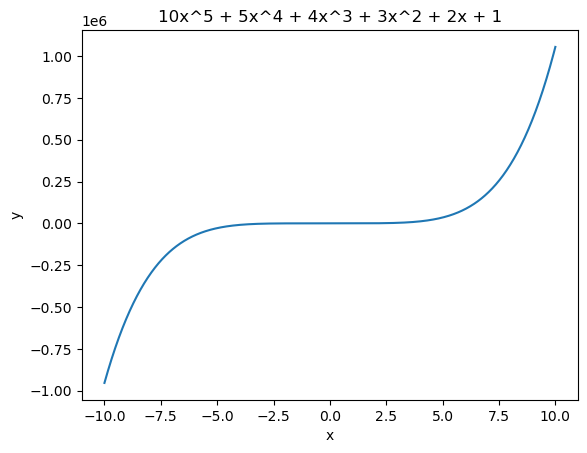

In [29]:
Polynomial([10, 5, 4, 3, 2, 1]).plot()